# Comparison of Covid19 trend in nordic countries

The following report compares the total, active, ICU and death cases in Sweden [1], Norway [2], Denmark [3] and Finland [4] from March 12 (total, active, deaths) and March 25 (ICU) until today.

Lockdowns were introduced in Norway, Denmark and Finland on March 12, March 13 and March 16 respectively. The lockdowns were lifted in mid April. 

Sweden has not enforced a lockdown as of August 28.

Below is an outline of the countries' population figures (last updated July 18):



Country | Population | Density | Urban population | Cities > 100,000 pop. | Cities > 500,000 pop. | Median age | Pop. over 65 y.o.
:---: | :---: | :---: | :---: | :---: | :---: | :---: | :---:
Sweden | 10,099,265 | 25/km^2 | 88% | 9 | 2 | 41 | 19.9%
Norway | 5,421,241 | 15/km^2 | 83% | 5 | 1 | 40 | 16.8%
Denmark | 5,792,202 | 137/km^2 | 88% | 5 | 1 | 42 | 19.7%
Finland | 5,540,720 | 18/km^2 | 86% | 9 | 1 | 43 | 21.2%

**Sweden has not reported the number of recoveries since may 4, making the number of active cases not reliable and likely greatly overestimated.**

[1] [Sweden](https://c19.se) [2] [Norway](https://www.vg.no/spesial/2020/corona/) [3] [Denmark](https://www.sst.dk/da/corona/tal-og-overvaagning) [4] [Finland](https://thl.fi/en/web/infectious-diseases-and-vaccinations/what-s-new/coronavirus-covid-19-latest-updates/situation-update-on-coronavirus)

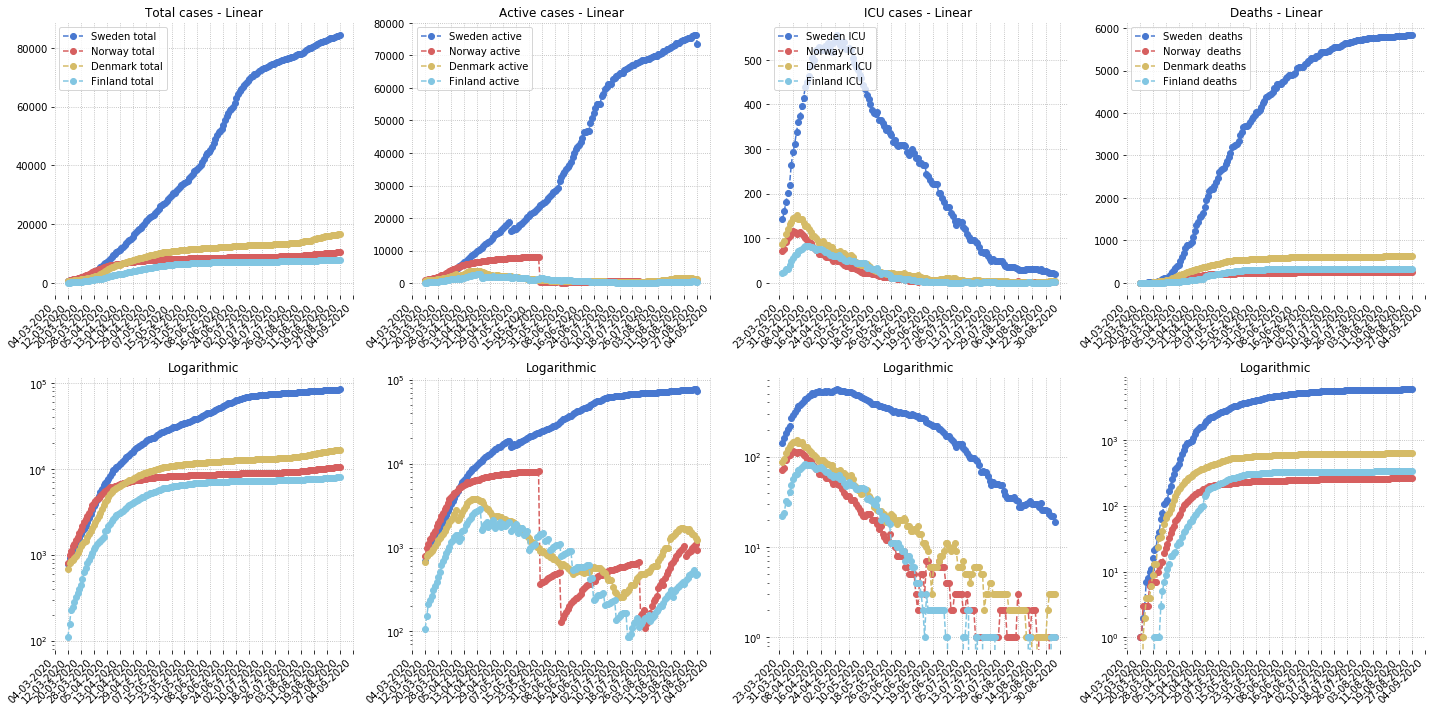

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import utils

# From march 12th
swe_tot = utils.load_sweden_total(13)[:-1]

nor_tot = utils.load_norway_total()

dan_tot = utils.load_denmark_total()

fin_tot = utils.load_finland_total()

# ----------
swe_act = np.array([685, 812, 958, 1036, 1113, 1187, 1276, 1412, 1607, 1734, 1897, 2003, 2243, 2448, 2747, 2948, 3326, 3574, 3928, 
                    4291, 4735, 5157, 5566, 5961, 6350, 6634, 7026, 7653, 8233, 8498, 8883, 9203, 9717, 10087, 10427, 10794, 11337, 
                    11871, 12382, 12691, 13039, 13603, 14247, 14969, 15027, 15548, 15740, 16349, 16904, 17591, 17963, 18483, 18713, 
                    15918, 16383, 16985, 16686, 17234, 17819, 18175, 18544, 19054, 19561, 20172, 20712, 21095, 21533, 21784, 22171, 
                    22853, 23390, 24026, 24296, 24534, 24988, 25487, 26081, 26644, 27260, 27915, 28350, 28668, 29302, 31396, 32495,
                    33499, 34297, 35185, 35608, 36396, 37105, 38668, 40042, 41158, 41804, 42503, 43400, 44753, 46311, 46311, 46611, 
                    46611, 49196, 50854, 52204, 53892, 54961, 55209, 55209, 57439, 58229, 59551, 60331, 61174, 61174, 61307, 62820, 
                    63052, 63586, 63964, 64484, 64484, 64484, 65376, 65672, 66100, 66475, 66829, 66907, 66907, 67641, 67770, 68059,
                    68296, 68537, 68537, 68537, 68879, 69012, 69253, 69560, 69852, 69918, 69918, 70414, 70557, 70881, 71385, 71396,
                    71843, 71843, 72400, 72585, 72874, 73337, 73700, 73700, 73700, 74481, 74617, 74780, 75148, 75396, 75396, 75396,
                    76006, 76168, 76337, 73578])

nor_act = utils.load_norway_active()

dan_act = utils.load_denmark_active()

fin_act = utils.load_finland_active()

# From march 25th
swe_icu = utils.load_sweden_icu(7)[:-1]

nor_icu = np.array([72, 75, 91, 101, 104, 110, 117, 114, 110, 112, 114, 109, 105, 101, 95, 92, 89, 83, 79, 73, 71, 64, 64, 65, 61, 58, 
                    58, 58, 54, 50, 53, 50, 49, 52, 44, 40, 37, 37, 37, 33, 33, 33, 30, 28, 26, 24, 22, 22, 23, 23, 23, 20, 20, 20, 18, 
                    16, 17, 14, 13, 12, 12, 14, 11, 11, 10, 8, 8, 8, 8, 9, 6, 6, 5, 5, 5, 5, 3, 2, 4, 5, 5, 3, 7, 7, 6, 5, 6, 6, 6, 7, 
                    6, 6, 6, 4, 4, 4, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
                    1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

dan_icu = np.array([87, 94, 109, 121, 131, 137, 145, 146, 153, 143, 142, 144, 133, 127, 127, 120, 113, 106, 104, 100, 93, 89, 92, 93, 87, 
                    84, 84, 81, 80, 74, 69, 70, 70, 72, 66, 66, 62, 61, 60, 62, 57, 49, 46, 43, 42, 39, 40, 43, 43, 37, 35, 32, 28, 27, 
                    26, 25, 25, 23, 23, 19, 21, 20, 23, 22, 20, 18, 20, 20, 20, 21, 20, 17, 17, 15, 15, 16, 15, 17, 14, 14, 11, 11, 10, 
                    9, 6, 3, 6, 6, 6, 7, 8, 8, 9, 11, 11, 10, 9, 10, 11, 9, 6, 6, 6, 7, 5, 5, 5, 4, 5, 6, 6, 6, 6, 5, 5, 2, 3, 3, 4, 4,
                    3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3])  

fin_icu = np.array([22, 24, 32, 31, 41, 49, 56, 62, 65, 72, 73, 76, 81, 83, 82, 82, 81, 80, 77, 74, 75, 75, 76, 73, 70, 68, 67, 63, 63, 
                    60, 61, 60, 62, 56, 56, 51, 48, 49, 52, 49, 49, 48, 44, 44, 45, 45, 45, 44, 34, 35, 33, 32, 30, 29, 34, 25, 20, 22, 
                    21, 21, 19, 18, 11, 11, 11, 10, 11, 10, 9, 9, 7, 8, 8, 7, 6, 6, 4, 4, 4, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
                    1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

# From march 12th
swe_d = utils.load_sweden_deaths(1)[:-1]

nor_d = utils.load_norway_deaths()

dan_d = utils.load_denmark_deaths()

fin_d = utils.load_finland_deaths()

interval = 8
start = dt.date(2020, 3, 12)
end = start + dt.timedelta(days=len(swe_tot))
days_12 = mdates.drange(start, end, dt.timedelta(days=1))

start = dt.date(2020, 3, 25)
end = start + dt.timedelta(days=len(swe_icu))
days_25 = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(241)
ax1.plot(days_12, swe_tot, '--bo', label='Sweden total')
ax1.plot(days_12, nor_tot, '--ro', label='Norway total')
ax1.plot(days_12, dan_tot, '--yo', label='Denmark total')
ax1.plot(days_12, fin_tot, '--co', label='Finland total')
ax1.legend(loc="upper left")
ax1.set_title('Total cases - Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(245)
ax2.plot(days_12, swe_tot, '--bo')
ax2.plot(days_12, nor_tot, '--ro')
ax2.plot(days_12, dan_tot, '--yo')
ax2.plot(days_12, fin_tot, '--co')
ax2.set_title('Logarithmic')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.set_yscale('log')
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(242)
ax3.plot(days_12, swe_act, '--bo', label='Sweden active')
ax3.plot(days_12, nor_act, '--ro', label='Norway active')
ax3.plot(days_12, dan_act, '--yo', label='Denmark active')
ax3.plot(days_12, fin_act, '--co', label='Finland active')
ax3.legend(loc="upper left")
ax3.set_title('Active cases - Linear')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax3.axes.grid(linestyle='dotted')

ax4 = fig.add_subplot(246)
ax4.plot(days_12, swe_act, '--bo')
ax4.plot(days_12, nor_act, '--ro')
ax4.plot(days_12, dan_act, '--yo')
ax4.plot(days_12, fin_act, '--co')
ax4.set_title('Logarithmic')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax4.set_yscale('log')
ax4.axes.grid(linestyle='dotted')

ax5 = fig.add_subplot(243)
ax5.plot(days_25, swe_icu, '--bo', label='Sweden ICU')
ax5.plot(days_25, nor_icu, '--ro', label='Norway ICU')
ax5.plot(days_25, dan_icu, '--yo', label='Denmark ICU')
ax5.plot(days_25, fin_icu, '--co', label='Finland ICU')
ax5.legend(loc="upper left")
ax5.set_title('ICU cases - Linear')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax5.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax5.axes.grid(linestyle='dotted')

ax6 = fig.add_subplot(247)
ax6.plot(days_25, swe_icu, '--bo')
ax6.plot(days_25, nor_icu, '--ro')
ax6.plot(days_25, dan_icu, '--yo')
ax6.plot(days_25, fin_icu, '--co')
ax6.set_title('Logarithmic')
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax6.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax6.set_yscale('log')
ax6.axes.grid(linestyle='dotted')

ax7 = fig.add_subplot(244)
ax7.plot(days_12, swe_d, '--bo', label='Sweden  deaths')
ax7.plot(days_12, nor_d, '--ro', label='Norway  deaths')
ax7.plot(days_12, dan_d, '--yo', label='Denmark deaths')
ax7.plot(days_12, fin_d, '--co', label='Finland deaths')
ax7.legend(loc="upper left")
ax7.set_title('Deaths - Linear')
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax7.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax7.axes.grid(linestyle='dotted')

ax8 = fig.add_subplot(248)
ax8.plot(days_12, swe_d, '--bo')
ax8.plot(days_12, nor_d, '--ro')
ax8.plot(days_12, dan_d, '--yo')
ax8.plot(days_12, fin_d, '--co')
ax8.set_title('Logarithmic')
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax8.set_yscale('log')
ax8.axes.grid(linestyle='dotted')


for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.tight_layout()
plt.show()

We then plot bar charts of deaths and active cases over total cases for each country:

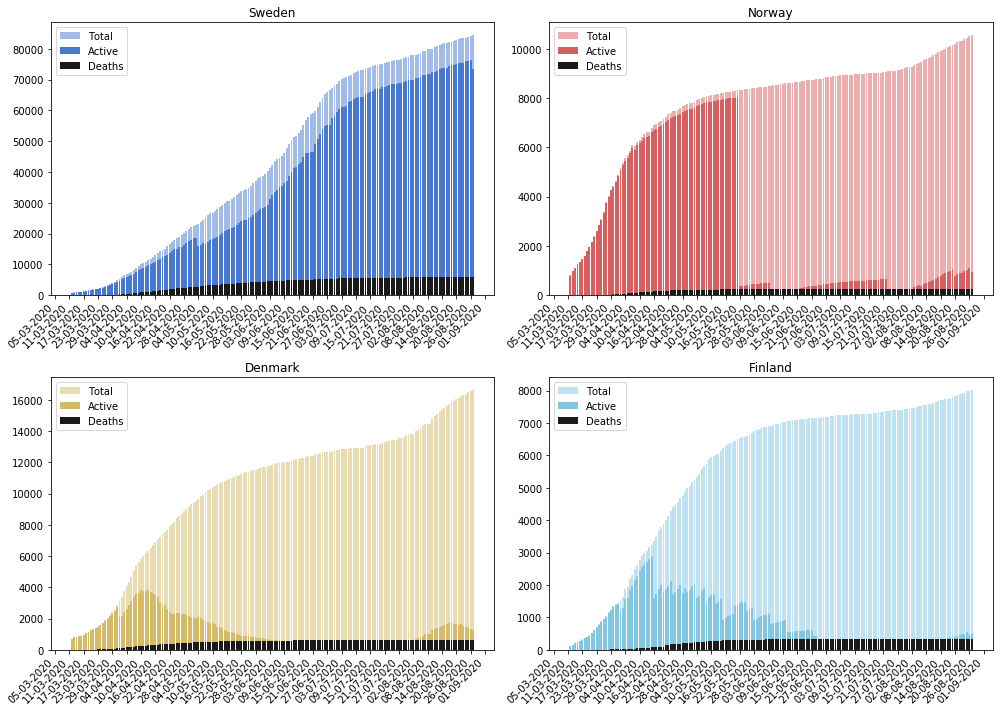

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

interval = 6

start = dt.date(2020, 3, 12)
end = start + dt.timedelta(days=len(swe_tot))
days = mdates.drange(start, end, dt.timedelta(days=1))

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
sns.set_color_codes('muted')
axes[0, 0].bar(days, swe_tot, color='b', alpha=0.5, label='Total')
axes[0, 0].bar(days, swe_act, color='b', label='Active')
axes[0, 0].bar(days, swe_d, color='k', label='Deaths')
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
axes[0, 0].xaxis.set_major_locator(mdates.DayLocator(interval=interval))
axes[0, 0].legend(loc="upper left")
axes[0, 0].set_title('Sweden')

axes[0, 1].bar(days, nor_tot, color='r', alpha=0.5, label='Total')
axes[0, 1].bar(days, nor_act, color='r', label='Active')
axes[0, 1].bar(days, nor_d, color='k', label='Deaths')
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
axes[0, 1].xaxis.set_major_locator(mdates.DayLocator(interval=interval))
axes[0, 1].legend(loc="upper left")
axes[0, 1].set_title('Norway')

axes[1, 0].bar(days, dan_tot, color='y', alpha=0.5, label='Total')
axes[1, 0].bar(days, dan_act, color='y', label='Active')
axes[1, 0].bar(days, dan_d, color='k', label='Deaths')
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
axes[1, 0].xaxis.set_major_locator(mdates.DayLocator(interval=interval))
axes[1, 0].legend(loc="upper left")
axes[1, 0].set_title('Denmark')

axes[1, 1].bar(days, fin_tot, color='c', alpha=0.5, label='Total')
axes[1, 1].bar(days, fin_act, color='c', label='Active')
axes[1, 1].bar(days, fin_d, color='k', label='Deaths')
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
axes[1, 1].xaxis.set_major_locator(mdates.DayLocator(interval=interval))
axes[1, 1].legend(loc="upper left")
axes[1, 1].set_title('Finland')

for ax in axes.ravel():
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
plt.tight_layout()
plt.show()

Below is the daily trend for total and active cases and deaths. The daily decrease in active cases for April 16 (-1271 cases) in Finland, May 5 in Sweden (-2795 cases) and May 22 in Norway (-7672 cases), due to a backlog report of recoveries, has been set to 0 to make the graph more readable.  

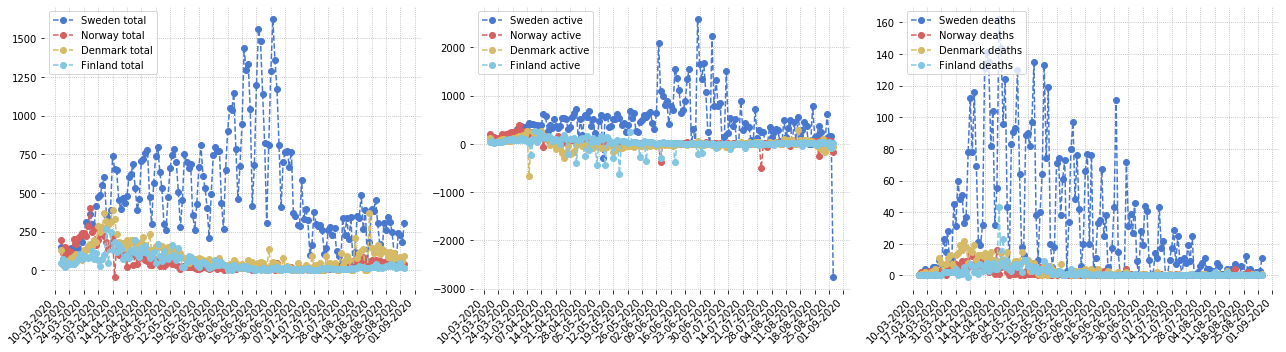

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

interval = 7

swe_tot_d = np.diff(swe_tot)
nor_tot_d = np.diff(nor_tot)
dan_tot_d = np.diff(dan_tot)
fin_tot_d = np.diff(fin_tot)

swe_act_d = np.diff(swe_act)
nor_act_d = np.diff(nor_act)
dan_act_d = np.diff(dan_act)
fin_act_d = np.diff(fin_act)

swe_d_d = np.diff(swe_d)
nor_d_d = np.diff(nor_d)
dan_d_d = np.diff(dan_d)
fin_d_d = np.diff(fin_d)

fin_act_d[34] = 0
swe_act_d[52] = 0
nor_act_d[70] = 0

start = dt.date(2020, 3, 13)
end = start + dt.timedelta(days=len(swe_tot) - 1)
days_12 = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.plot(days_12, swe_tot_d, '--bo', label='Sweden total')
ax1.plot(days_12, nor_tot_d, '--ro', label='Norway total')
ax1.plot(days_12, dan_tot_d, '--yo', label='Denmark total')
ax1.plot(days_12, fin_tot_d, '--co', label='Finland total')
ax1.legend(loc="upper left")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(132)
ax2.plot(days_12, swe_act_d, '--bo', label='Sweden active')
ax2.plot(days_12, nor_act_d, '--ro', label='Norway active')
ax2.plot(days_12, dan_act_d, '--yo', label='Denmark active')
ax2.plot(days_12, fin_act_d, '--co', label='Finland active')
ax2.legend(loc="upper left")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')


ax3 = fig.add_subplot(133)
ax3.plot(days_12, swe_d_d, '--bo', label='Sweden deaths')
ax3.plot(days_12, nor_d_d, '--ro', label='Norway deaths')
ax3.plot(days_12, dan_d_d, '--yo', label='Denmark deaths')
ax3.plot(days_12, fin_d_d, '--co', label='Finland deaths')
ax3.legend(loc="upper left")
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax3.axes.grid(linestyle='dotted')

for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(5)
fig.set_figwidth(18)
plt.tight_layout()
plt.show()

We then plot the 7-day moving average by country for total and active cases and deaths, from March 18:

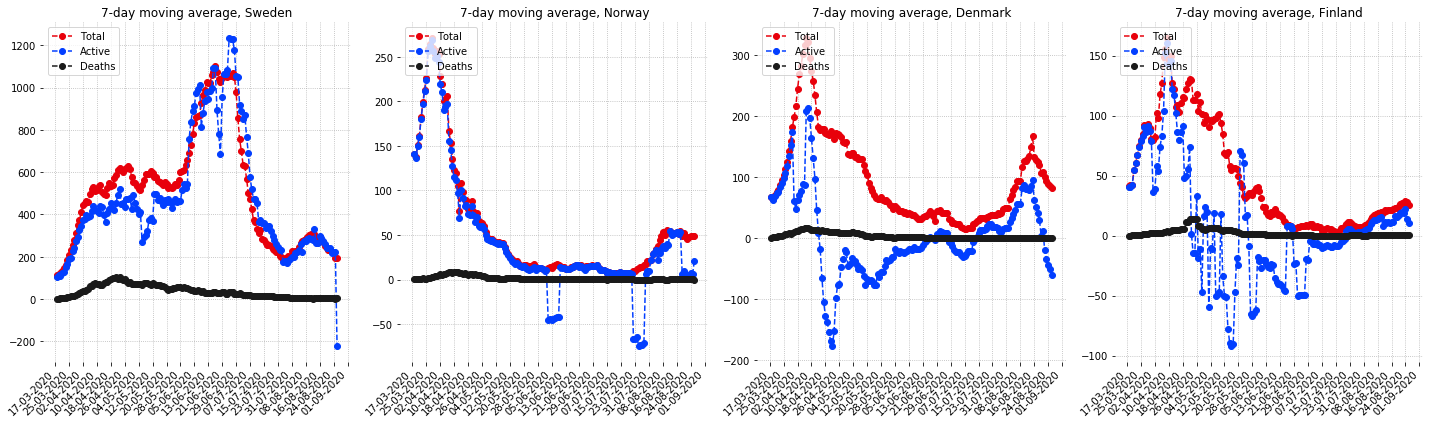

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

swe_tot_avg = [np.mean(swe_tot_d[i - 6:i + 1]) for i in range(6, len(swe_tot_d))]
swe_act_avg = [np.mean(swe_act_d[i - 6:i + 1]) for i in range(6, len(swe_act_d))]
swe_d_avg = [np.mean(swe_d_d[i - 6:i + 1]) for i in range(6, len(swe_d_d))]

nor_tot_avg = [np.mean(nor_tot_d[i - 6:i + 1]) for i in range(6, len(nor_tot_d))]
nor_act_avg = [np.mean(nor_act_d[i - 6:i + 1]) for i in range(6, len(nor_act_d))]
nor_d_avg = [np.mean(nor_d_d[i - 6:i + 1]) for i in range(6, len(nor_d_d))]

dan_tot_avg = [np.mean(dan_tot_d[i - 6:i + 1]) for i in range(6, len(dan_tot_d))]
dan_act_avg = [np.mean(dan_act_d[i - 6:i + 1]) for i in range(6, len(dan_act_d))]
dan_d_avg = [np.mean(dan_d_d[i - 6:i + 1]) for i in range(6, len(dan_d_d))]

fin_tot_avg = [np.mean(fin_tot_d[i - 6:i + 1]) for i in range(6, len(fin_tot_d))]
fin_act_avg = [np.mean(fin_act_d[i - 6:i + 1]) for i in range(6, len(fin_act_d))]
fin_d_avg = [np.mean(fin_d_d[i - 6:i + 1]) for i in range(6, len(fin_d_d))]

start = dt.date(2020, 3, 18)
end = start + dt.timedelta(days=len(swe_tot_avg))
days = mdates.drange(start, end, dt.timedelta(days=1))

interval = 8

fig = plt.figure()
ax1 = fig.add_subplot(141)
ax1.plot(days, swe_tot_avg, '--ro', label='Total')
ax1.plot(days, swe_act_avg, '--bo', label='Active')
ax1.plot(days, swe_d_avg, '--ko', label='Deaths')
ax1.legend(loc="upper left")
ax1.set_title('7-day moving average, Sweden')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(142)
ax2.plot(days, nor_tot_avg, '--ro', label='Total')
ax2.plot(days, nor_act_avg, '--bo', label='Active')
ax2.plot(days, nor_d_avg, '--ko', label='Deaths')
ax2.legend(loc="upper left")
ax2.set_title('7-day moving average, Norway')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(143)
ax3.plot(days, dan_tot_avg, '--ro', label='Total')
ax3.plot(days, dan_act_avg, '--bo', label='Active')
ax3.plot(days, dan_d_avg, '--ko', label='Deaths')
ax3.legend(loc="upper left")
ax3.set_title('7-day moving average, Denmark')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax3.axes.grid(linestyle='dotted')

ax4 = fig.add_subplot(144)
ax4.plot(days, fin_tot_avg, '--ro', label='Total')
ax4.plot(days, fin_act_avg, '--bo', label='Active')
ax4.plot(days, fin_d_avg, '--ko', label='Deaths')
ax4.legend(loc="upper left")
ax4.set_title('7-day moving average, Finland')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax4.axes.grid(linestyle='dotted')

sns.set_color_codes('bright')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.tight_layout()
plt.show()

We then plot a bar chart of the total cases and deaths per 100 000, as well as a chart of the percentage of total deaths over total cases (last updated: August 27). Norway was the country with the most cases per 100k inhabitants from the start of the outbreak until it was surpassed by Sweden on April 23.

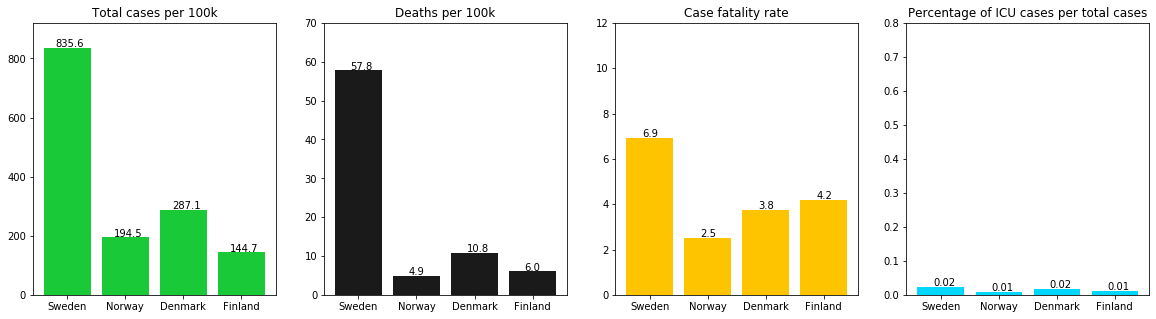

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

swe_pop = 10099265
nor_pop = 5421241
dan_pop = 5792202
fin_pop = 5540720

totals = {}
totals['Sweden'] = (swe_tot[-1] / swe_pop) * 100000
totals['Norway'] = (nor_tot[-1] / nor_pop) * 100000
totals['Denmark'] = (dan_tot[-1] / dan_pop) * 100000
totals['Finland'] = (fin_tot[-1] / fin_pop) * 100000

deaths = {}
deaths['Sweden'] = (swe_d[-1] / swe_pop) * 100000
deaths['Norway'] = (nor_d[-1] / nor_pop) * 100000
deaths['Denmark'] = (dan_d[-1] / dan_pop) * 100000
deaths['Finland'] = (fin_d[-1] / fin_pop) * 100000

death_percent = {}
death_percent['Sweden'] = swe_d[-1] / swe_tot[-1] * 100
death_percent['Norway'] = nor_d[-1] / nor_tot[-1] * 100
death_percent['Denmark'] = dan_d[-1] / dan_tot[-1] * 100
death_percent['Finland'] = fin_d[-1] / fin_tot[-1] * 100

icu_percent = {}
icu_percent['Sweden'] = swe_icu[-1] / swe_tot[-1] * 100
icu_percent['Norway'] = nor_icu[-1] / nor_tot[-1] * 100
icu_percent['Denmark'] = dan_icu[-1] / dan_tot[-1] * 100
icu_percent['Finland'] = fin_icu[-1] / fin_tot[-1] * 100

fig = plt.figure()
ax1 = fig.add_subplot(141)
ax1.bar(totals.keys(), totals.values(), color='g')
ax1.set_title('Total cases per 100k')
for i, v in enumerate(totals.values()):
    ax1.text(i - 0.2, v + 2.5, '{:.1f}'.format(v),  color='black')
ax1.set_ylim(0, 920)
ax2 = fig.add_subplot(142)
ax2.bar(deaths.keys(), deaths.values(), color='k')
ax2.set_title('Deaths per 100k')
for i, v in enumerate(deaths.values()):
    ax2.text(i - 0.14, v + 0.18, '{:.1f}'.format(v),  color='black')
ax2.set_ylim(0, 70)
ax3 = fig.add_subplot(143)
ax3.bar(death_percent.keys(), death_percent.values(), color='y')
ax3.set_title('Case fatality rate')
for i, v in enumerate(death_percent.values()):
    ax3.text(i - 0.12, v + 0.05, '{:.1f}'.format(v),  color='black')
ax3.set_ylim(0, 12)
ax4 = fig.add_subplot(144)
ax4.bar(icu_percent.keys(), icu_percent.values(), color='c')
ax4.set_title('Percentage of ICU cases per total cases')
for i, v in enumerate(icu_percent.values()):
    ax4.text(i - 0.12, v + 0.003, '{:.2f}'.format(v),  color='black')
ax4.set_ylim(0, 0.8)
sns.set_color_codes('bright')
fig.set_figheight(5)
fig.set_figwidth(20)
plt.show()

min_tot = ('{:.1f}').format(totals['Sweden'] / totals['Denmark'])
max_tot = ('{:.1f}').format(totals['Sweden'] / totals['Finland'])
min_d = ('{:.1f}').format(deaths['Sweden'] / deaths['Denmark'])
max_d = ('{:.1f}').format(deaths['Sweden'] / deaths['Norway'])
min_p = ('{:.1f}').format(death_percent['Sweden'] / death_percent['Denmark']) 
max_p = ('{:.1f}').format(death_percent['Sweden'] / death_percent['Norway'])


We can see that the total cases per 100k are between {{min_tot}} and {{max_tot}} times higher than in the other countries, the deaths per 100k are between {{min_d}} and {{max_d}} times higher, and the percentage of deaths per total cases (case fatality rate) is between {{min_p}} and {{max_p}} times higher.